In [1]:
import pandas as pd

df = pd.read_csv('^GSPC.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
1,2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2,2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
3,2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
4,2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000


In [2]:
#check missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [3]:
#Calculate Volumes in the 10,000s
Volume_0000s =df.Volume/10000
df['Volume_0000s'] = Volume_0000s

In [4]:
#extract the year from the date
year = [date[:4] for date in df.Date]
df['Year'] = year

In [5]:
#plot trading volumes
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, MaxNLocator)
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.Date,df.Volume_0000s,color="navy")
ax.xaxis.set_major_locator(MaxNLocator())
plt.title("Daily Volume ('0000s)",fontsize='x-large')
plt.show()


<Figure size 1500x500 with 1 Axes>

## Get Descriptive Statistics

In [6]:
#get descriptive statistics
df.Volume_0000s.describe()

count      1068.000000
mean     371047.732210
std       88460.902909
min      129654.000000
25%      324340.000000
50%      353702.500000
75%      390511.250000
max      904469.000000
Name: Volume_0000s, dtype: float64

In [7]:
df.kurtosis(axis=0)

Open           -0.810579
High           -0.832859
Low            -0.780518
Close          -0.806468
Adj Close      -0.806468
Volume          9.494637
Volume_0000s    9.494637
Year           -1.118145
dtype: float64

In [8]:
df['Volume_0000s'].quantile([.05, 0.5, .95])

0.05    282199.1
0.50    353702.5
0.95    528427.9
Name: Volume_0000s, dtype: float64

In [9]:
df.skew(axis=0)

Open           -0.053811
High           -0.058821
Low            -0.050886
Close          -0.053538
Adj Close      -0.053538
Volume          2.432474
Volume_0000s    2.432474
Year            0.129047
dtype: float64

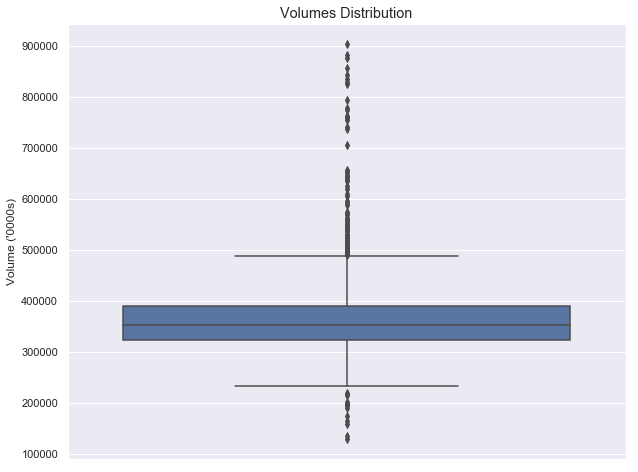

In [10]:
#plot boxplot to better understand the volume distribution
import seaborn as sns

fig,ax = plt.subplots(figsize=(10,8))
ax = sns.boxplot( y="Volume_0000s", data=df)
plt.ylabel("Volume ('0000s)",fontsize='large')
plt.title('Volumes Distribution',fontsize='x-large')
plt.show()


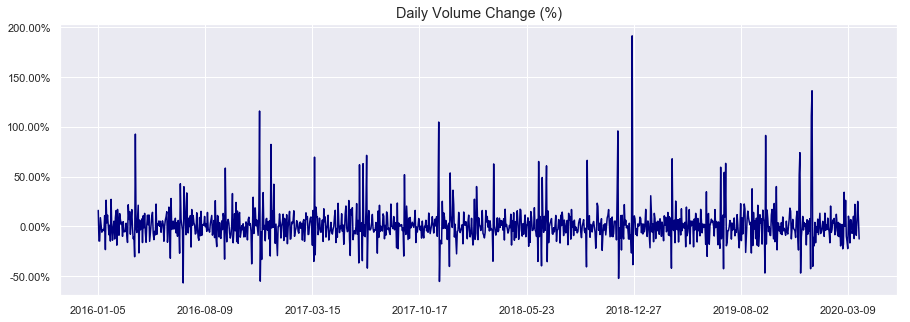

In [12]:
#day over day volume change

df_change = df.shift(-1)
df_change = df_change[:len(df_change)-1]
Volume_change = ((df.Volume/df.shift(-1).Volume)-1)
df_change['volume_change'] = Volume_change
#df_change['volume_change'] = df_change['volume_change'].map(lambda n: '{:,.2%}'.format(n))
df_change[:len(df_change)-1] 


#plot volume day over day change

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_change.Date,df_change.volume_change,color="navy")
ax.xaxis.set_major_locator(MaxNLocator())
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.title('Daily Volume Change (%)',fontsize='x-large')
plt.show()


## Split Dataset into Train and Test Set
- 5 datasets for cross-validation
- 3 datasets for testing

In [5]:
import math
import numpy as np
df_change = df.shift(-1)
df_change['log_change']= np.log(df.shift(-1).Volume/df.Volume)
df_change['change']= (df.shift(-1).Volume/df.Volume)
df_change=df_change.dropna()
df_change['year']=pd.DatetimeIndex(df_change['Date']).year
#df_change = df_change[df_change['year']>=2018]
df_change = df_change[df_change['year']<2018]

In [30]:
i=0   
for i in range(len(X_train)):
    df_train=pd.DataFrame({'date':X_train[i],'log_change':y_train[i]})
    df_test=pd.DataFrame({'date':X_test[i],'log_change':y_test[i]})
   
    df_train.to_csv("df_train"+str(i+1)+"_slide.csv",header=True)
    df_test.to_csv("df_test"+str(i+1)+"_slide.csv",header=True)
    i+=1

In [28]:
import numpy as np

data = list(range(502)) #for year 2016-2017
#data = list(range(565)) #for year 2018+
window_size = 274 
splits = []
j=0
#create sliding window datasets so that each dataset is of equal size - by index
#dataset "slides" forward 60 days for every sequential dataset
for i in range(window_size, len(data)):
    train = np.array(data[i-window_size+j:i+j])
    test = np.array(data[i+j:i+60+j]) #Test set of 60 days
    splits.append((train, test))
    j+=60
# View result
for a_tuple in splits[:3]:
    print(a_tuple)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [33]:
X_train=[[] for i in range(4)]
X_test = [[] for i in range(4)]
y_train = [[] for i in range(4)]
y_test = [[] for i in range(4)]
i=0

#split data into train and test set based on index

for train_index, test_index in splits[:4]:

    X_train[i], X_test[i] = X[train_index], X[test_index]
    y_train[i], y_test[i] = y[train_index], y[test_index]
    i+=1

In [36]:
X_train[0]

array(['2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
       '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
       '2016-01-15', '2016-01-19', '2016-01-20', '2016-01-21',
       '2016-01-22', '2016-01-25', '2016-01-26', '2016-01-27',
       '2016-01-28', '2016-01-29', '2016-02-01', '2016-02-02',
       '2016-02-03', '2016-02-04', '2016-02-05', '2016-02-08',
       '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12',
       '2016-02-16', '2016-02-17', '2016-02-18', '2016-02-19',
       '2016-02-22', '2016-02-23', '2016-02-24', '2016-02-25',
       '2016-02-26', '2016-02-29', '2016-03-01', '2016-03-02',
       '2016-03-03', '2016-03-04', '2016-03-07', '2016-03-08',
       '2016-03-09', '2016-03-10', '2016-03-11', '2016-03-14',
       '2016-03-15', '2016-03-16', '2016-03-17', '2016-03-18',
       '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24',
       '2016-03-28', '2016-03-29', '2016-03-30', '2016-03-31',
       '2016-04-01', '2016-04-04', '2016-04-05', '2016-

In [ ]:
#export train/test sets - for 2018+, 5 cross-validation datasets, 1 test dataset
df_train1=pd.DataFrame({'date':X_train[0],'log_change':y_train[0]})
df_train2=pd.DataFrame({'date':X_train[1],'log_change':y_train[1]})
df_train3=pd.DataFrame({'date':X_train[2],'log_change':y_train[2]})
df_train4=pd.DataFrame({'date':X_train[3],'log_change':y_train[3]})
df_train5=pd.DataFrame({'date':X_train[4],'log_change':y_train[4]})
df_train6=pd.DataFrame({'date':X_train[5],'log_change':y_train[5]})


df_test1=pd.DataFrame({'date':X_test[0],'log_change':y_test[0]})
df_test2=pd.DataFrame({'date':X_test[1],'log_change':y_test[1]})
df_test3=pd.DataFrame({'date':X_test[2],'log_change':y_test[2]})
df_test4=pd.DataFrame({'date':X_test[3],'log_change':y_test[3]})
df_test5=pd.DataFrame({'date':X_test[4],'log_change':y_test[4]})
df_test6=pd.DataFrame({'date':X_test[5],'log_change':y_test[5]})

In [37]:
#get 2 test datasets for 2016/2017
i=0   
for i in range(len(X_train)):
    df_train=pd.DataFrame({'date':X_train[i],'log_change':y_train[i]})
    df_test=pd.DataFrame({'date':X_test[i],'log_change':y_test[i]})
   
    df_train.to_csv("df_train"+str(i+1)+"_0.75year_2016.csv",header=True)
    df_test.to_csv("df_test"+str(i+1)+"_0.75year_2016.csv",header=True)
    i+=1